# Final Project

# Problem statement: To predict which customers will likely default on loan repayment.

#Data set is from kaggle.com

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('./data/loansset.csv')

C:\Users\kcw8\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# number of rows and columns
# 887,350 observations, 75 columns (the 74 features & response)

loans.shape

(887350, 75)

In [4]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status
0,10167159,12019080,16800,16800,16800.0,36,6.62,515.83,A,A2,...,NaN,NaN,NaN,NaN,NaN,34800.0,NaN,NaN,NaN,Fully Paid
1,10156133,12008196,35000,35000,35000.0,60,21.48,956.35,E,E2,...,NaN,NaN,NaN,NaN,NaN,118400.0,NaN,NaN,NaN,Current
2,9008907,10800828,30000,30000,29950.0,36,13.67,1020.53,B,B5,...,NaN,NaN,NaN,NaN,NaN,151200.0,NaN,NaN,NaN,Fully Paid
3,7584694,9266836,2800,2800,2800.0,36,12.99,94.33,B,B4,...,NaN,NaN,NaN,NaN,NaN,51200.0,NaN,NaN,NaN,Fully Paid
4,5619692,7002088,28000,28000,28000.0,36,8.90,889.09,A,A5,...,NaN,NaN,NaN,NaN,NaN,9999999.0,NaN,NaN,NaN,Current


In [5]:
loans.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
annual_inc_bracket              object
verification_status             object
issue_d                         object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [6]:
# Concise summary (including memory usage)

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887350 entries, 0 to 887349
Data columns (total 75 columns):
id                             887350 non-null int64
member_id                      887350 non-null int64
loan_amnt                      887350 non-null int64
funded_amnt                    887350 non-null int64
funded_amnt_inv                887350 non-null float64
term                           887350 non-null int64
int_rate                       887350 non-null float64
installment                    887350 non-null float64
grade                          887350 non-null object
sub_grade                      887350 non-null object
emp_title                      835900 non-null object
emp_length                     842525 non-null object
home_ownership                 887350 non-null object
annual_inc                     887350 non-null float64
annual_inc_bracket             887350 non-null object
verification_status            887350 non-null object
issue_d                   

In [7]:
# Describe all columns, including non-numeric.

loans.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status
count,8.873500e+05,8.873500e+05,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000,887350,887350,...,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000,887350
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254525,56320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601779
mean,3.246619e+07,3.500297e+07,14755.619260,14742.234237,14702.917498,43.201325,13.246866,436.727404,NaN,NaN,...,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307,NaN
std,2.282696e+07,2.411292e+07,8435.354701,8429.794626,8441.868754,10.998766,4.381873,244.183611,NaN,NaN,...,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067,NaN
min,5.473400e+04,7.069400e+04,500.000000,500.000000,0.000000,36.000000,5.320000,15.670000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,NaN
25%,9.206925e+06,1.087746e+07,8000.000000,8000.000000,8000.000000,36.000000,9.990000,260.730000,NaN,NaN,...,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000,NaN
50%,3.443340e+07,3.709543e+07,13000.000000,13000.000000,13000.000000,36.000000,12.990000,382.550000,NaN,NaN,...,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000,NaN
75%,5.490818e+07,5.847142e+07,20000.000000,20000.000000,20000.000000,60.000000,16.200000,572.600000,NaN,NaN,...,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000,NaN


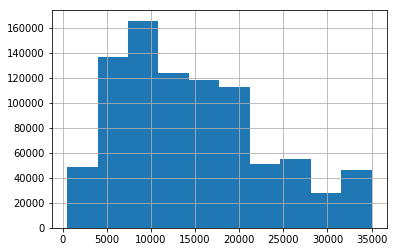

In [8]:
# Draw a histogram of a column (the distribution of funded amnt).

loans.funded_amnt.hist();

In [9]:
# Target 'y' represented as such
# - Default : 0
# - Pay : 1


loans.loan_status.value_counts()     # Most useful for categorical variables

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1962
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       758
Name: loan_status, dtype: int64

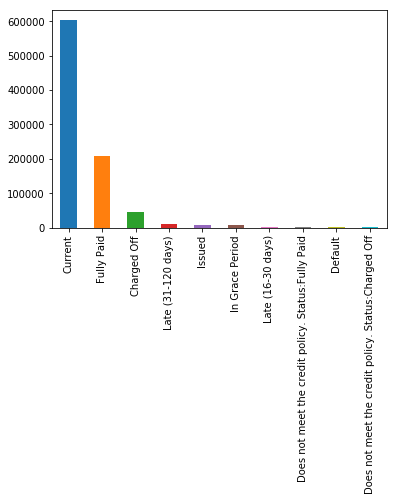

In [10]:
# to check for imbalanced dataset

loans.loan_status.value_counts().plot(kind='bar')     # Quick plot by category

In [11]:
loans.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51450
emp_length                      44825
home_ownership                      0
annual_inc                          0
annual_inc_bracket                  0
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           761350
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_

In [12]:
# Drop some columns which are not relevant

loans.drop(['id', 'member_id', 'loan_amnt', 'emp_title', 'sub_grade', 'addr_state','annual_inc', 'issue_d', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'dti', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint'], axis=1, inplace=True)

In [13]:
loans.drop(['earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'mths_since_last_record', 'mths_since_last_major_derog','open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_last_delinq', 'collection_recovery_fee', 'recoveries', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'tot_coll_amt', 'tot_cur_bal'], axis=1, inplace=True)

In [14]:
loans.shape

(887350, 28)

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887350 entries, 0 to 887349
Data columns (total 28 columns):
funded_amnt                   887350 non-null int64
funded_amnt_inv               887350 non-null float64
term                          887350 non-null int64
int_rate                      887350 non-null float64
installment                   887350 non-null float64
grade                         887350 non-null object
emp_length                    842525 non-null object
home_ownership                887350 non-null object
annual_inc_bracket            887350 non-null object
verification_status           887350 non-null object
purpose                       887350 non-null object
delinq_2yrs                   887350 non-null int64
inq_last_6mths                887350 non-null int64
open_acc                      887350 non-null int64
pub_rec                       887350 non-null int64
revol_bal                     887350 non-null int64
revol_util                    886877 non-null

In [16]:
loans.describe(include='all')

,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc_bracket,verification_status,...,initial_list_status,out_prncp,out_prncp_inv,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim,loan_status
count,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000,887350,842525,887350,887350,887350,...,887350,887350.000000,887350.000000,887350.000000,887350.000000,887234.000000,887350,887350.000000,8.171030e+05,887350
unique,NaN,NaN,NaN,NaN,NaN,7,11,6,9,3,...,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,10
top,NaN,NaN,NaN,NaN,NaN,B,10,MORTGAGE,50000-74999,Source Verified,...,f,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,Current
freq,NaN,NaN,NaN,NaN,NaN,254525,291566,443550,282894,329558,...,456819,NaN,NaN,NaN,NaN,NaN,886839,NaN,NaN,601779
mean,14742.234237,14702.917498,43.201325,13.246866,436.727404,NaN,NaN,NaN,NaN,NaN,...,NaN,8403.399479,8399.987758,0.396494,2164.209791,0.014380,NaN,0.004991,3.206862e+04,NaN
std,8429.794626,8441.868754,10.998766,4.381873,244.183611,NaN,NaN,NaN,NaN,NaN,...,NaN,8493.453201,8490.000547,4.085707,4794.847843,0.134191,NaN,0.077625,3.749826e+04,NaN
min,500.000000,0.000000,36.000000,5.320000,15.670000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00,NaN
25%,8000.000000,8000.000000,36.000000,9.990000,260.730000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,280.170000,0.000000,NaN,0.000000,1.390000e+04,NaN
50%,13000.000000,13000.000000,36.000000,12.990000,382.550000,NaN,NaN,NaN,NaN,NaN,...,NaN,6459.900000,6456.430000,0.000000,462.800000,0.000000,NaN,0.000000,2.370000e+04,NaN
75%,20000.000000,20000.000000,60.000000,16.200000,572.600000,NaN,NaN,NaN,NaN,NaN,...,NaN,13659.900000,13654.050000,0.000000,831.277500,0.000000,NaN,0.000000,3.980000e+04,NaN


funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    44825
home_ownership                    0
annual_inc_bracket                0
verification_status               0
purpose                           0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      473
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_rec_late_fee                0
last_pymnt_amnt                   0
collections_12_mths_ex_med      116
application_type                  0
acc_now_delinq                    0
total_rev_hi_lim              70247
loan_status                 

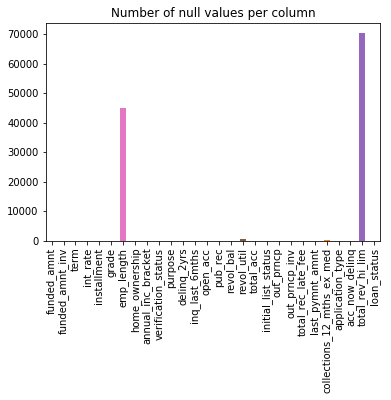

In [17]:
# Count the missing values in each column — remember by default, axis=0.
print((loans.isnull().sum()))

loans.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

In [18]:
loans['emp_length'].replace(['1','2','3'],'1-3 yr', inplace=True)
loans['emp_length'].replace(['4','5','6'],'4-6 yr', inplace=True)
loans['emp_length'].replace(['7', '8','9'],'7-9 yr', inplace=True)
loans['emp_length'].replace(['< 1'],'<1 yr', inplace=True)
loans['emp_length'].replace(['10'],'10+ yr',inplace=True)
loans['home_ownership'].replace(['ANY', 'NONE'], 'OTHER', inplace=True)


In [19]:
loans.dtypes

funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc_bracket             object
verification_status            object
purpose                        object
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
initial_list_status            object
out_prncp                     float64
out_prncp_inv                 float64
total_rec_late_fee            float64
last_pymnt_amnt               float64
collections_12_mths_ex_med    float64
application_type               object
acc_now_delinq                  int64
total_rev_hi

In [20]:
loans.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc_bracket,verification_status,...,initial_list_status,out_prncp,out_prncp_inv,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim,loan_status
0,16800,16800.0,36,6.62,515.83,A,<1 yr,MORTGAGE,1 mil and above,Verified,...,w,0.00,0.00,0.0,10725.02,0.0,INDIVIDUAL,0,34800.0,Fully Paid
1,35000,35000.0,60,21.48,956.35,E,10+ yr,MORTGAGE,1 mil and above,Verified,...,f,25218.54,25218.54,0.0,956.35,0.0,INDIVIDUAL,0,118400.0,Current
2,30000,29950.0,36,13.67,1020.53,B,10+ yr,MORTGAGE,1 mil and above,Verified,...,f,0.00,0.00,0.0,29659.24,0.0,INDIVIDUAL,0,151200.0,Fully Paid
3,2800,2800.0,36,12.99,94.33,B,10+ yr,RENT,1 mil and above,Source Verified,...,f,0.00,0.00,0.0,768.14,0.0,INDIVIDUAL,0,51200.0,Fully Paid
4,28000,28000.0,36,8.90,889.09,A,1-3 yr,MORTGAGE,1 mil and above,Verified,...,f,4351.81,4351.81,0.0,889.09,0.0,INDIVIDUAL,0,9999999.0,Current


In [21]:
# Convert target y-variable values to binary - 0 (pay) or 1 (default)

loans['loan_status'].replace(['Default', 'Does not meet the credit policy. Status:Charged Off', 'Charged Off', 'Late (31-120 days)', 'Late (16-30 days)'],1, inplace=True)
loans['loan_status'].replace(['Current','Fully Paid', 'Issued', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period'],0, inplace=True)

In [22]:
# Check for imbalanced dataset

loans.loan_status.value_counts()  

# About 7.4% were balanced

0    826177
1     61173
Name: loan_status, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
import numpy as np

In [24]:
loans.dropna(inplace=True)

In [25]:
print((loans.isnull().sum()))

funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc_bracket            0
verification_status           0
purpose                       0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_rec_late_fee            0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
total_rev_hi_lim              0
loan_status                   0
dtype: int64


In [26]:
loans.shape

(773968, 28)

In [27]:
for col in ['funded_amnt_inv', 'int_rate','installment', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_amnt','loan_status','revol_util', 'collections_12_mths_ex_med', 'total_rev_hi_lim']:
    loans[col] = loans[col].astype('int64')

In [28]:
loans.dtypes

funded_amnt                    int64
funded_amnt_inv                int64
term                           int64
int_rate                       int64
installment                    int64
grade                         object
emp_length                    object
home_ownership                object
annual_inc_bracket            object
verification_status           object
purpose                       object
delinq_2yrs                    int64
inq_last_6mths                 int64
open_acc                       int64
pub_rec                        int64
revol_bal                      int64
revol_util                     int64
total_acc                      int64
initial_list_status           object
out_prncp                      int64
out_prncp_inv                  int64
total_rec_late_fee             int64
last_pymnt_amnt                int64
collections_12_mths_ex_med     int64
application_type              object
acc_now_delinq                 int64
total_rev_hi_lim               int64
l

In [29]:
# Ordinal variables 

loans['annual_inc_bracket'].replace(['under 15k'],0, inplace=True)
loans['annual_inc_bracket'].replace(['15000-24999'],1, inplace=True)
loans['annual_inc_bracket'].replace(['25000-34999'],2, inplace=True)
loans['annual_inc_bracket'].replace(['35000-49999'],3, inplace=True)
loans['annual_inc_bracket'].replace(['50000-74999'],4, inplace=True)
loans['annual_inc_bracket'].replace(['75000-99999'],5, inplace=True)
loans['annual_inc_bracket'].replace(['100000-199999'],6, inplace=True)
loans['annual_inc_bracket'].replace(['200000-999999'],7, inplace=True)
loans['annual_inc_bracket'].replace(['1 mil and above'],8, inplace=True)


In [30]:
# Ordinal variables

loans['emp_length'].replace(['<1 yr'],0, inplace=True)
loans['emp_length'].replace(['1-3 yr'],1, inplace=True)
loans['emp_length'].replace(['4-6 yr'],2, inplace=True)
loans['emp_length'].replace(['7-9 yr'],3, inplace=True)
loans['emp_length'].replace(['10+ yr'],4,inplace=True)

In [31]:
# Ordinal variables

loans['grade'].replace(['A'], 0, inplace=True)
loans['grade'].replace(['B'], 1, inplace=True)
loans['grade'].replace(['C'], 2, inplace=True)
loans['grade'].replace(['D'], 3, inplace=True)
loans['grade'].replace(['E'], 4, inplace=True)
loans['grade'].replace(['F'], 5, inplace=True)
loans['grade'].replace(['G'], 6, inplace=True)

In [32]:
loans.dtypes

funded_amnt                    int64
funded_amnt_inv                int64
term                           int64
int_rate                       int64
installment                    int64
grade                          int64
emp_length                     int64
home_ownership                object
annual_inc_bracket             int64
verification_status           object
purpose                       object
delinq_2yrs                    int64
inq_last_6mths                 int64
open_acc                       int64
pub_rec                        int64
revol_bal                      int64
revol_util                     int64
total_acc                      int64
initial_list_status           object
out_prncp                      int64
out_prncp_inv                  int64
total_rec_late_fee             int64
last_pymnt_amnt                int64
collections_12_mths_ex_med     int64
application_type              object
acc_now_delinq                 int64
total_rev_hi_lim               int64
l

In [33]:
for col in ['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']:
    loans[col] = loans[col].astype('category')

In [34]:
loans.dtypes

funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                         int64
installment                      int64
grade                            int64
emp_length                       int64
home_ownership                category
annual_inc_bracket               int64
verification_status           category
purpose                       category
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status           category
out_prncp                        int64
out_prncp_inv                    int64
total_rec_late_fee               int64
last_pymnt_amnt                  int64
collections_12_mths_ex_med       int64
application_type              category
acc_now_delinq           

In [35]:
pd.get_dummies(loans, columns=["home_ownership"]).head


<bound method NDFrame.head of         funded_amnt  funded_amnt_inv  term  int_rate  installment  grade  \
0             16800            16800    36         6          515      0   
1             35000            35000    60        21          956      4   
2             30000            29950    36        13         1020      1   
3              2800             2800    36        12           94      1   
4             28000            28000    36         8          889      0   
5             20000            20000    36        18          727      3   
6              4000             4000    36        10          130      1   
7             28000            28000    36         6          858      0   
8             16000            16000    36        12          535      2   
9             35000            35000    36         7         1095      0   
10            35000            35000    60         9          729      1   
11            25000            25000    36         6      

In [36]:
loans.dtypes

funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                         int64
installment                      int64
grade                            int64
emp_length                       int64
home_ownership                category
annual_inc_bracket               int64
verification_status           category
purpose                       category
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status           category
out_prncp                        int64
out_prncp_inv                    int64
total_rec_late_fee               int64
last_pymnt_amnt                  int64
collections_12_mths_ex_med       int64
application_type              category
acc_now_delinq           

In [37]:
one_hot = pd.get_dummies(loans['home_ownership'])
loans = loans.drop('home_ownership', axis=1)
loans = loans.join(one_hot)

In [38]:
loans.dtypes

funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                         int64
installment                      int64
grade                            int64
emp_length                       int64
annual_inc_bracket               int64
verification_status           category
purpose                       category
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status           category
out_prncp                        int64
out_prncp_inv                    int64
total_rec_late_fee               int64
last_pymnt_amnt                  int64
collections_12_mths_ex_med       int64
application_type              category
acc_now_delinq                   int64
total_rev_hi_lim         

In [39]:
for col in ['MORTGAGE', 'OTHER', 'OWN', 'RENT']:
    loans[col] = loans[col].astype('int64')

In [40]:
loans.dtypes

funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                         int64
installment                      int64
grade                            int64
emp_length                       int64
annual_inc_bracket               int64
verification_status           category
purpose                       category
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status           category
out_prncp                        int64
out_prncp_inv                    int64
total_rec_late_fee               int64
last_pymnt_amnt                  int64
collections_12_mths_ex_med       int64
application_type              category
acc_now_delinq                   int64
total_rev_hi_lim         

In [41]:
one_hot = pd.get_dummies(loans['application_type'])
loans = loans.drop('application_type', axis=1)
loans = loans.join(one_hot)

In [42]:
loans.dtypes

funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                         int64
installment                      int64
grade                            int64
emp_length                       int64
annual_inc_bracket               int64
verification_status           category
purpose                       category
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status           category
out_prncp                        int64
out_prncp_inv                    int64
total_rec_late_fee               int64
last_pymnt_amnt                  int64
collections_12_mths_ex_med       int64
acc_now_delinq                   int64
total_rev_hi_lim                 int64
loan_status              

In [43]:
for col in ['INDIVIDUAL', 'JOINT']:
    loans[col] = loans[col].astype('int64')

In [44]:
loans.dtypes

funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                         int64
installment                      int64
grade                            int64
emp_length                       int64
annual_inc_bracket               int64
verification_status           category
purpose                       category
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status           category
out_prncp                        int64
out_prncp_inv                    int64
total_rec_late_fee               int64
last_pymnt_amnt                  int64
collections_12_mths_ex_med       int64
acc_now_delinq                   int64
total_rev_hi_lim                 int64
loan_status              

In [45]:
one_hot = pd.get_dummies(loans['purpose'])
loans = loans.drop('purpose', axis=1)
loans = loans.join(one_hot)

In [46]:
loans.dtypes

funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                         int64
installment                      int64
grade                            int64
emp_length                       int64
annual_inc_bracket               int64
verification_status           category
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status           category
out_prncp                        int64
out_prncp_inv                    int64
total_rec_late_fee               int64
last_pymnt_amnt                  int64
collections_12_mths_ex_med       int64
acc_now_delinq                   int64
total_rev_hi_lim                 int64
loan_status                      int64
MORTGAGE                 

In [47]:
for col in ['car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding']:
    loans[col] = loans[col].astype('int64')

In [48]:
loans.dtypes

funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                         int64
installment                      int64
grade                            int64
emp_length                       int64
annual_inc_bracket               int64
verification_status           category
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status           category
out_prncp                        int64
out_prncp_inv                    int64
total_rec_late_fee               int64
last_pymnt_amnt                  int64
collections_12_mths_ex_med       int64
acc_now_delinq                   int64
total_rev_hi_lim                 int64
loan_status                      int64
MORTGAGE                 

In [49]:
one_hot = pd.get_dummies(loans['initial_list_status'])
loans = loans.drop('initial_list_status', axis=1)
loans = loans.join(one_hot)

In [50]:
loans.dtypes

funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                         int64
installment                      int64
grade                            int64
emp_length                       int64
annual_inc_bracket               int64
verification_status           category
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
out_prncp                        int64
out_prncp_inv                    int64
total_rec_late_fee               int64
last_pymnt_amnt                  int64
collections_12_mths_ex_med       int64
acc_now_delinq                   int64
total_rev_hi_lim                 int64
loan_status                      int64
MORTGAGE                         int64
OTHER                    

In [51]:
for col in ['f', 'w']:
    loans[col] = loans[col].astype('int64')

In [52]:
one_hot = pd.get_dummies(loans['verification_status'])
loans = loans.drop('verification_status', axis=1)
loans = loans.join(one_hot)

In [53]:
loans.dtypes

funded_amnt                   int64
funded_amnt_inv               int64
term                          int64
int_rate                      int64
installment                   int64
grade                         int64
emp_length                    int64
annual_inc_bracket            int64
delinq_2yrs                   int64
inq_last_6mths                int64
open_acc                      int64
pub_rec                       int64
revol_bal                     int64
revol_util                    int64
total_acc                     int64
out_prncp                     int64
out_prncp_inv                 int64
total_rec_late_fee            int64
last_pymnt_amnt               int64
collections_12_mths_ex_med    int64
acc_now_delinq                int64
total_rev_hi_lim              int64
loan_status                   int64
MORTGAGE                      int64
OTHER                         int64
OWN                           int64
RENT                          int64
INDIVIDUAL                  

In [54]:
for col in ['Not Verified', 'Source Verified','Verified']:
    loans[col] = loans[col].astype('int64')

In [55]:
loans.dtypes

funded_amnt                   int64
funded_amnt_inv               int64
term                          int64
int_rate                      int64
installment                   int64
grade                         int64
emp_length                    int64
annual_inc_bracket            int64
delinq_2yrs                   int64
inq_last_6mths                int64
open_acc                      int64
pub_rec                       int64
revol_bal                     int64
revol_util                    int64
total_acc                     int64
out_prncp                     int64
out_prncp_inv                 int64
total_rec_late_fee            int64
last_pymnt_amnt               int64
collections_12_mths_ex_med    int64
acc_now_delinq                int64
total_rev_hi_lim              int64
loan_status                   int64
MORTGAGE                      int64
OTHER                         int64
OWN                           int64
RENT                          int64
INDIVIDUAL                  

In [56]:
# Split data into train and test data.

# create a new column that for each row, generates a random number between 0 and 1, and if that value is less than or equal 
# to .75, then sets the value of that cell as True and false otherwise.A quick way of randomly assigning some rows to be
# used as the training data and test data.

loans['is_train'] = np.random.uniform(0, 1, len(loans)) <= .75


In [57]:
loans.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc_bracket,delinq_2yrs,inq_last_6mths,...,renewable_energy,small_business,vacation,wedding,f,w,Not Verified,Source Verified,Verified,is_train
0,16800,16800,36,6,515,0,0,8,0,2,...,0,0,0,0,0,1,0,0,1,False
1,35000,35000,60,21,956,4,4,8,0,1,...,0,0,0,0,1,0,0,0,1,True
2,30000,29950,36,13,1020,1,4,8,3,2,...,0,0,0,0,1,0,0,0,1,False
3,2800,2800,36,12,94,1,4,8,4,0,...,0,0,0,0,1,0,0,1,0,True
4,28000,28000,36,8,889,0,1,8,0,2,...,0,0,0,0,1,0,0,0,1,True


In [58]:
# create 2 new dataframes, one with the training rows, one with test rows.

train, test = loans[loans['is_train']==True], loans[loans['is_train']==False]


In [59]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 580179
Number of observations in the test data: 193789


In [70]:
# Rearrange to put target var at last column
col_at_end = ['loan_status']
loans = loans[[c for c in loans if c not in col_at_end] + [c for c in col_at_end if c in loans]]

loans.dtypes
# Create a list of the feature column's names
features = loans.columns[:46]

# View features
features

Index(['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'annual_inc_bracket', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'total_rev_hi_lim', 'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'INDIVIDUAL',
       'JOINT', 'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'f', 'w', 'Not Verified', 'Source Verified'],
      dtype='object')

In [71]:
y = train['loan_status']

#view tartget
y


1         0
3         0
4         0
5         0
6         0
7         0
9         0
10        0
11        0
13        0
15        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
35        0
36        0
37        0
38        0
         ..
887167    0
887168    1
887180    0
887184    0
887188    0
887189    0
887190    0
887192    1
887195    0
887196    0
887200    0
887207    0
887214    0
887223    0
887233    0
887243    0
887246    0
887259    0
887273    0
887281    0
887283    0
887298    0
887299    0
887301    0
887304    1
887305    0
887309    0
887322    0
887347    0
887348    0
Name: loan_status, Length: 580179, dtype: int64

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (loan_status)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [73]:
#Apply classifier model to test data

preds = clf.predict(test[features])


In [74]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ]])

In [75]:
# Create confusion matrix
pd.crosstab(test['loan_status'], preds, rownames=['Actual outcome'], colnames=['Predicted outcome'])

Predicted outcome,0,1
Actual outcome,,
0,180375,1454
1,5509,6451


In [ ]:
# What percent of the predictions were correct?
# Answer: Accuracy = correct predictions / total predictions = 186,826 (180,375+6,451)/ 193,789 = 96.4%

# Error = 100% -96.4% = 3.6%

# Percentage of actual default cases
# 5509+6451 out of 193,789 = 6.17% 
# Since error (3.6%) < 6.17%, model is ok.


 
# What percent of the positive cases (pay = 0) were caught? 
# Answer: Recall = true positives/ (true positives+false negatives) = 180,375/ 181,829 (180,375+1,454) = 99.2% 

# What percent of positive predictions were correct? 
# Answer: Precision = true positives/ (true positives+false positives) = 180,375/ 185,884 (180,375+5,509) = 97.0% 


# What percent of the default cases (default = 1) were caught? 
# Answer: The "recall" was 6,451 out of 11,960 (6,451+5,509)  = 54.0% 

# What percent of default predictions were correct? 
# Answer: The "precision" was 6,451 out of 7,905 (1,454+6,451) = 81.6% 



In [76]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))



[('funded_amnt', 0.032198120503969245),
 ('funded_amnt_inv', 0.034384154254898276),
 ('term', 0.006695949140797059),
 ('int_rate', 0.03127712478353425),
 ('installment', 0.04259453249230582),
 ('grade', 0.02331392002735328),
 ('emp_length', 0.016806659984038925),
 ('annual_inc_bracket', 0.018532023514919605),
 ('delinq_2yrs', 0.009700676529379015),
 ('inq_last_6mths', 0.014152887448755683),
 ('open_acc', 0.030869430043057783),
 ('pub_rec', 0.006828560082498552),
 ('revol_bal', 0.04499524322931899),
 ('revol_util', 0.040002084928343486),
 ('total_acc', 0.03644580457384803),
 ('out_prncp', 0.07415926897495427),
 ('out_prncp_inv', 0.0806914952837195),
 ('total_rec_late_fee', 0.02879013583750602),
 ('last_pymnt_amnt', 0.3290474221322534),
 ('collections_12_mths_ex_med', 0.0013770350981201866),
 ('acc_now_delinq', 0.0006520279022260713),
 ('total_rev_hi_lim', 0.04496432458976227),
 ('MORTGAGE', 0.004157118640453062),
 ('OTHER', 0.00011069805056092825),
 ('OWN', 0.002999173463793877),
 ('REN

In [ ]:
# Top 3 predictor variables from Random Forest are last_pymnt_amnt, out_prncp and out_prncp_inv

# Conclusion: 
# This model can predict to a high accuracy which can help the bank filter out bad customers, hence improving profits which 
# is essential for the business.
